In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from jcopml.plot import plot_missing_value
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import grid_search_params as gsp 
from jcopml.feature_importance import mean_score_decrease


#### Import Data

In [2]:
data = pd.read_csv('E:\Data Science\Python\machine learning exercises\dataset\creditcard.csv', index_col=0)

In [3]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1


#### Plot Missing Value

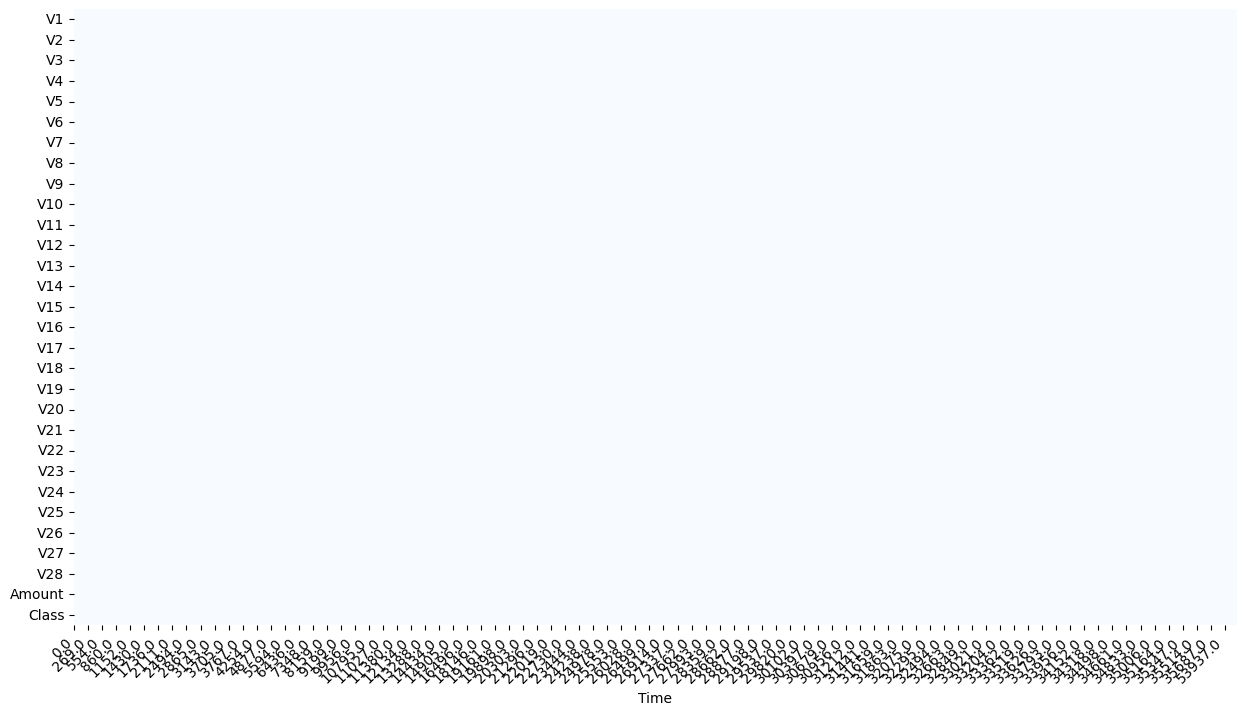

In [4]:
plot_missing_value(data)

#### Create Model Benchmark

In [5]:
X = data.drop('Class', axis=1)
y = data.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [6]:
X_train.shape, X_test.shape

((24393, 29), (6099, 29))

In [7]:
gsp.svm_params

{'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [8]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

gsp_model = GridSearchCV(estimator=pipeline, param_grid=gsp.svm_params, verbose=1, n_jobs=-1, cv=3)
gsp_model.fit(X_train, y_train)



Fitting 3 folds for each of 49 candidates, totalling 147 fits


c:\Users\09021\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object'))])),
                                       ('algo', SVC(max_iter=500))]),
             n_jobs=-1,
             param_grid={'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             verbose=1)

In [34]:
print('Best Accuarcy Score : ', gsp_model.best_score_)
print('Data Train Accuracy : ', gsp_model.score(X_train, y_train))
print('Data Test Accuracy : ', gsp_model.score(X_test, y_test))

Best Accuarcy Score :  0.9968023613331694
Data Train Accuracy :  0.9976632640511622
Data Test Accuracy :  0.9972126578127561


Akurasi 99% tidak selalu baik, terkadang kita harus curiga dan melakukan pengecekan kembali.

1. Apakah terjadi data leakage
2. Apakah data imbalance
3. Apakah problemnya sesuatu yang sederhana

In [35]:
data.Class.value_counts(normalize=True)

0    0.983865
1    0.016135
Name: Class, dtype: float64

Ternyata data tersebut imbalance sehingga model terlalu fokus mempelajari pola dari kelas mayoritas.

1. Akurasi tidak bisa dipakai untuk data imbalance. Sebaiknya gunakan F1 score

In [36]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

gsp_model = GridSearchCV(estimator=pipeline, param_grid=gsp.svm_params, verbose=1, n_jobs=-1, cv=3, scoring='f1')
gsp_model.fit(X_train, y_train)


Fitting 3 folds for each of 49 candidates, totalling 147 fits


c:\Users\09021\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object'))])),
                                       ('algo', SVC(max_iter=500))]),
             n_jobs=-1,
             param_grid={'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='f1', verbose=1)

In [37]:
print('Best F1 Score : ', gsp_model.best_score_)
print('Data Train F1 Score : ', gsp_model.score(X_train, y_train))
print('Data Test F1 Score : ', gsp_model.score(X_test, y_test))

Best F1 Score :  0.8931580891132548


Data Train F1 Score :  0.9228687415426252
Data Test F1 Score :  0.908108108108108


In [38]:
from jcopml.plot import plot_confusion_matrix

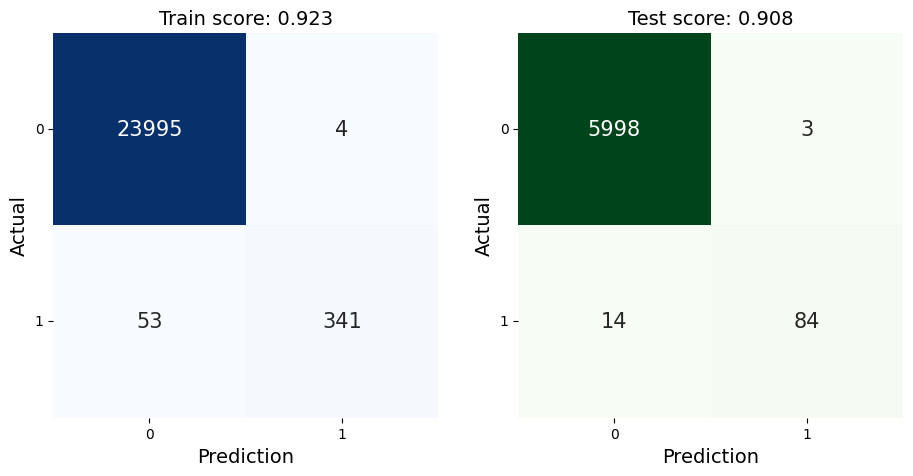

In [39]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, gsp_model)

In [40]:
gsp.svm_poly_params

{'prep__numeric__poly__degree': [1, 2, 3],
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

#### Improve Model

- Melakukan improve pada model dengan imbalance data dapat dilakukan dengan menambahkan parameter class weight

In [41]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

parameter = {
    'algo__gamma': np.logspace(-3, 3, 7),
    'algo__C': np.logspace(-3, 3, 7),
    'algo__class_weight': [{0: x, 1: 1-x} for x in [0.05, 0.1, 0.25]]
    }

gsp_model = GridSearchCV(estimator=pipeline, param_grid=parameter, verbose=1, n_jobs=-1, cv=3, scoring='f1')
gsp_model.fit(X_train, y_train)


Fitting 3 folds for each of 147 candidates, totalling 441 fits


c:\Users\09021\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object'))])),
                                       ('algo', SVC(max_iter=500))]),
             n_jobs=-1,
             param_grid={'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'algo__class_weight': [{0: 0.05, 1: 0.95},
                                                {0: 0.1, 1: 0.9},
                                                {0: 0.25, 1: 0.75}],
                         'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='f1', verbose=1)

In [42]:
gsp_model.best_params_

{'algo__C': 10.0, 'algo__class_weight': {0: 0.1, 1: 0.9}, 'algo__gamma': 0.01}

In [45]:
print('Best F1 Score : ', gsp_model.best_score_)
print('Data Train F1  Score : ', gsp_model.score(X_train, y_train))
print('Data Test  F1 Score : ', gsp_model.score(X_test, y_test))

Best F1 Score :  0.8912147693379487
Data Train F1  Score :  0.8300220750551877
Data Test  F1 Score :  0.847926267281106


#### Fiture Importance

,feature,importance,stdev
2,V3,0.343684,0.002683
13,V14,0.289224,0.007557
11,V12,0.171444,0.007947
21,V22,0.137288,0.004253
3,V4,0.117596,0.006588
0,V1,0.097895,0.012136
4,V5,0.095247,0.007462
14,V15,0.089500,0.006062
17,V18,0.082479,0.005257
1,V2,0.073471,0.004880


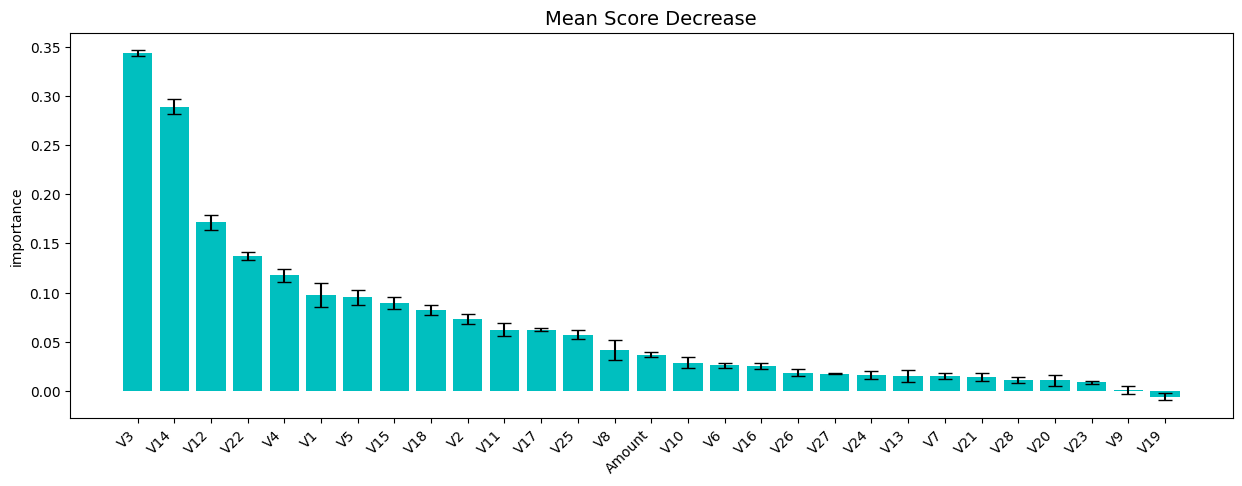

In [44]:
mean_score_decrease(X_train, y_train, gsp_model, plot=True)

- Fitur importance merupakan fitur yang memiliki pengaruh dalam menghasilkan score akhir dari sebuah model machine-learning